In [2]:
import pandas as pd
import os, random, shutil

from keras_preprocessing import image
import matplotlib.pyplot as plt

In [4]:
!ls

Untitled.ipynb                images_training_rev1
all_ones_benchmark.csv        images_training_rev1.zip
all_zeros_benchmark.csv       training_solutions_rev1 2.csv
central_pixel_benchmark.csv   training_solutions_rev1.csv
images_test_rev1              training_solutions_rev1.zip
images_test_rev1.zip


In [5]:
df = pd.read_csv('training_solutions_rev1.csv')

In [6]:
df.shape

(61578, 38)

In [7]:
df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [13]:
ellipticals = df[(df['Class1.1']>0.8) & (df['Class7.1']>0.4)]['GalaxyID'].tolist()
lenticulars = df[(df['Class1.1']>0.8) & (df['Class7.2']>0.4)]['GalaxyID'].tolist()
spirals = df[(df['Class1.2']>0.8) & (df['Class2.1']>0.4)]['GalaxyID'].tolist()

print("ellipticals: ", len(ellipticals))
print("lenticulars: ", len(lenticulars))
print("spirals: ", len(spirals))

ellipticals:  4555
lenticulars:  3861
spirals:  3078


In [14]:
my_data = 'data'

In [16]:
def _proc_images(src, dst, label, arr, percent):
    train_dir = os.path.join(dst, 'train')
    val_dir = os.path.join(dst, 'validation')
    
    train_dest = os.path.join(train_dir, label)
    val_dest   = os.path.join(val_dir, label)
    
    if not os.path.exists(train_dest):
        os.makedirs(train_dest)

    if not os.path.exists(val_dest):
        os.makedirs(val_dest)
    
    random.shuffle(arr)
    
    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(train_dest, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(val_dest, str(i)+'.jpg'))
    
    print(label, 'done!')

In [17]:
_proc_images('images_training_rev1', 'data', 'elliptical', ellipticals, 0.7)
_proc_images('images_training_rev1', 'data', 'lenticular', lenticulars, 0.7)
_proc_images('images_training_rev1', 'data', 'spiral', spirals, 0.7)

elliptical done!
lenticular done!
spiral done!


In [18]:
ls

Untitled.ipynb                 images_test_rev1.zip*
all_ones_benchmark.csv*        images_training_rev1/
all_zeros_benchmark.csv*       images_training_rev1.zip*
central_pixel_benchmark.csv*   training_solutions_rev1 2.csv*
data/                          training_solutions_rev1.csv*
images_test_rev1/              training_solutions_rev1.zip*


In [19]:
print('Total train elliptical:', len(os.listdir(os.path.join('data', 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join('data', 'train', 'lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join('data', 'train', 'spiral'))))

Total train elliptical: 3188
Total train lenticular: 2702
Total train spiral: 2154


In [20]:
print('Total test elliptical:', len(os.listdir(os.path.join('data', 'validation', 'elliptical'))))
print('Total test lenticular:', len(os.listdir(os.path.join('data', 'validation', 'lenticular'))))
print('Total test spiral:', len(os.listdir(os.path.join('data', 'validation', 'spiral'))))

Total test elliptical: 1367
Total test lenticular: 1159
Total test spiral: 924


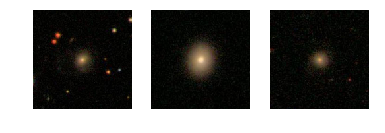

In [21]:
# elliptical class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'elliptical'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'elliptical', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

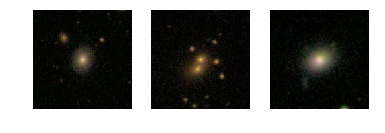

In [22]:
# lenticular class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'lenticular'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'lenticular', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

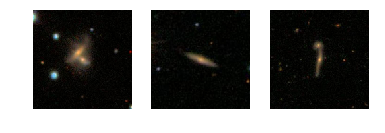

In [23]:
# spiral class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'spiral'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'spiral', file) , target_size=(150, 150))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)